# Sistema de Recomendação por Conteúdo (Book Club)

In [22]:
#Importação de bibliotecas necessárias para análise dos dados
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")


In [23]:
#Importação de dados referentes aos livros
dados = pd.read_csv("dados.csv", sep = ",", encoding = "UTF-8")


In [24]:
#Renomeando colunas e visualizando os tipos dos dados
#Alterando o cabeçalho das colunas, para simplificar manipulação
dados = dados.rename(columns={'Títulos':'titulos','Categorias':'categorias','Preços(£)':'precos','Avaliações':'avaliacoes','Estocagem':'estocagem'})
display(dados)
dados.info()


,titulos,categorias,precos,avaliacoes,estocagem
0,A Light in the Attic,Poetry,Â51.77,Three,22
1,Tipping the Velvet,Historical Fiction,Â53.74,One,20
2,Soumission,Fiction,Â50.10,One,20
3,Sharp Objects,Mystery,Â47.82,Four,20
4,Sapiens: A Brief History of Humankind,History,Â54.23,Five,20
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,Â55.53,One,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Â57.06,Four,1
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Â16.97,Five,1
998,1st to Die (Women's Murder Club #1),Mystery,Â53.98,One,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   titulos     1000 non-null   object
 1   categorias  1000 non-null   object
 2   precos      1000 non-null   object
 3   avaliacoes  1000 non-null   object
 4   estocagem   1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [25]:
#Tratamento dos dados referentes ao (preço dos livros) e as (avaliações dos livros)

#Para os preços
#Coluna de 'precos'
df_precos = dados['precos']

#Retirando caracteres especiais
def corrigir_precos(preco):
    preco = preco.replace('Â', '')
    return preco
df_precos = df_precos.apply(corrigir_precos)

#Transformando os valores em variáveis do tipo float
df_precos = df_precos.astype(float, errors = 'raise')
#Avaliando preço médio, máximo e mínimo
df_precos.describe()

count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: precos, dtype: float64

In [26]:
#Tratamento dos dados referentes ao (preço dos livros) e as (avaliações dos livros)

#Para as avaliações
#Coluna de 'avaliacoes'
df_estrelas = dados['avaliacoes']

#Substituindo caracteres especiais
def corrigir_estrelas(estrela):
    estrela = estrela.replace('One','1')
    estrela = estrela.replace('Two','2')
    estrela = estrela.replace('Three','3')
    estrela = estrela.replace('Four','4')
    estrela = estrela.replace('Five','5')
    return estrela
df_estrelas = df_estrelas.apply(corrigir_estrelas)

#Transformando os valores em variáveis do tipo int
df_estrelas = df_estrelas.astype(int, errors = 'raise')

#Avaliando frequência do número de estrelas
df_estrelas.value_counts()


1    226
3    203
5    196
2    196
4    179
Name: avaliacoes, dtype: int64

In [27]:
#Reorganizando a tabela, agora com valores tratados

#Retirar colunas 'precos' e 'avaliacoes', para posteriormente colocar dados tratados
dados.drop(['precos','avaliacoes'], axis=1, inplace=True)

#Crio as colunas novamente agora com 'df_precos' e 'df_estrelas' cujo os dados estão em float e inteiro
dados['precos'] = df_precos
dados['avaliacoes'] = df_estrelas

display(dados)
dados.info()

,titulos,categorias,estocagem,precos,avaliacoes
0,A Light in the Attic,Poetry,22,51.77,3
1,Tipping the Velvet,Historical Fiction,20,53.74,1
2,Soumission,Fiction,20,50.10,1
3,Sharp Objects,Mystery,20,47.82,4
4,Sapiens: A Brief History of Humankind,History,20,54.23,5
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,1,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,1,57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,1,16.97,5
998,1st to Die (Women's Murder Club #1),Mystery,1,53.98,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titulos     1000 non-null   object 
 1   categorias  1000 non-null   object 
 2   estocagem   1000 non-null   int64  
 3   precos      1000 non-null   float64
 4   avaliacoes  1000 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 35.3+ KB


In [28]:
#Análise gráfica dos preços dos livros(biblioteca plotly)

#Visualizando valores para definir as faixas que serão usadas no gráfico
print(df_precos.mean())
print(df_precos.max())
print(df_precos.min())

35.07034999999999
59.99
10.0


In [29]:
# mean = 35,00 pounds , max. = 59,99 pounds e min. = 10,00 pounds  

#Faixas correspondentes:
# 45,00 até 59,99 £ --> Preços altos (faixa 1)

# 25,00 até 45,00 £ --> Preços médios (faixa 2)

# 10,00 até 25,00 £ --> Preços baixos (faixa 3)

#Criando a lista das faixas que serão usadas no gráfico pizza
faixas = []
for df in df_precos:
    if (df  >= 45.00):
        faixa1 = 'Preços altos ( 45,00 - 59,99 £)'
        faixas.append(faixa1)
        
    if (df >= 25.00 ) and (df < 45.00):
        faixa2 = 'Preços médios (25.00 - 44.99 £)'
        faixas.append(faixa2)
        
    if (df >= df_precos.min()) and (df < 25.00):
        faixa3 = 'Preços baixos (10,00 - 24,99 £)'
        faixas.append(faixa3)

#DataFrame para uso no gráfico
valores = pd.DataFrame({'precos':df_precos,'faixas':faixas})
display (valores) 

,precos,faixas
0,51.77,"Preços altos ( 45,00 - 59,99 £)"
1,53.74,"Preços altos ( 45,00 - 59,99 £)"
2,50.10,"Preços altos ( 45,00 - 59,99 £)"
3,47.82,"Preços altos ( 45,00 - 59,99 £)"
4,54.23,"Preços altos ( 45,00 - 59,99 £)"
...,...,...
995,55.53,"Preços altos ( 45,00 - 59,99 £)"
996,57.06,"Preços altos ( 45,00 - 59,99 £)"
997,16.97,"Preços baixos (10,00 - 24,99 £)"
998,53.98,"Preços altos ( 45,00 - 59,99 £)"


In [30]:
# Gráfico 'Pie Chart'

pie_chart = px.pie(
    
    data_frame = valores,
    values = 'precos' ,     #valores que definiram a porcentagem do gráfico, de acordo com a faixa pertencente
    names = 'faixas'     ,     #cada pedaço corresponde ao alerta criado
    color = 'faixas'     ,     #cores serão definidas pelas coluna 'faixas'
    
    
    #definindo o mapa de cores
    color_discrete_map = {'Preços altos (45,00 - 59,99 £)':'red','Preços médios (25,00 - 44,99 £)':'purple','Preços baixos (10,00 - 24,99 £)':'blue'},
    title = 'Classificação dos livros por preço', #título do gráfico
    
    #ajuste de legenda
    labels={'faixas':'Faixa','precos':'Preço total'},
    template = 'presentation',                       #templates disponíveis
    width = 700,                                     #largura em pixels
    height = 400,                                    #altura em pixels
    hole = 0.5                                       #espaço vazio(buraco) no meio do grafo
    
)

pio.show(pie_chart)

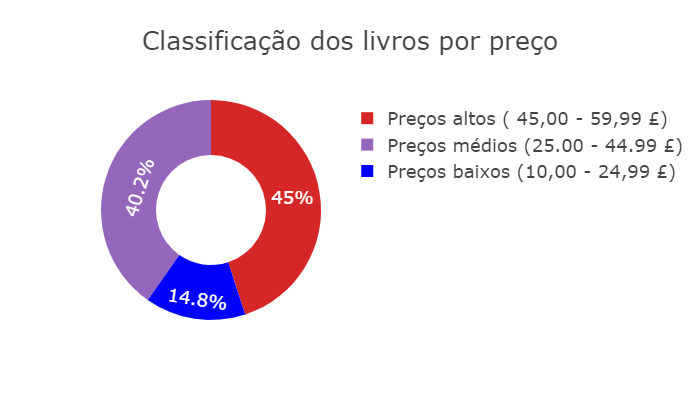

In [31]:
# Análise gráfica dentre os livros com (4 e 5 estrelas) quais categorias se destacam no Book Club
    
#Selecionando livros com avaliações de 4 e 5 estrelas
df = dados.loc[dados['avaliacoes'] >= 4]
df.drop(['titulos','estocagem','precos'], axis=1, inplace=True)#retira colunas desnecessárias ao gráfico 



df = df.sort_values(by = ['categorias']) #organiza o dataframe em ordem alfabética de categorias
df.reset_index(drop = True) #organiza a coluna de indexação


,categorias,avaliacoes
0,Add a comment,4
1,Add a comment,4
2,Add a comment,4
3,Add a comment,4
4,Add a comment,5
...,...,...
370,Young Adult,4
371,Young Adult,4
372,Young Adult,4
373,Young Adult,4


In [32]:
# Gráfico 'Bar Chart'
bar_chart = px.bar (

    x = df['categorias'],
    y = df['avaliacoes'],
    orientation='v',                                 # 'v','h': orientação
    barmode='relative' , 
    color = df['avaliacoes'], 
    opacity=0.9,# map your chosen colors
    title='Livros bem avaliados por categoria',       #título do gráfico
    width=1000,                                       # largura in pixels
    height=720,                                       # altura em pixels
    template='gridon',                                #template 
    labels={"x": 'Categoria',  #ajuste de legenda
    "y":"Estrelas"},
)

bar_chart.show()

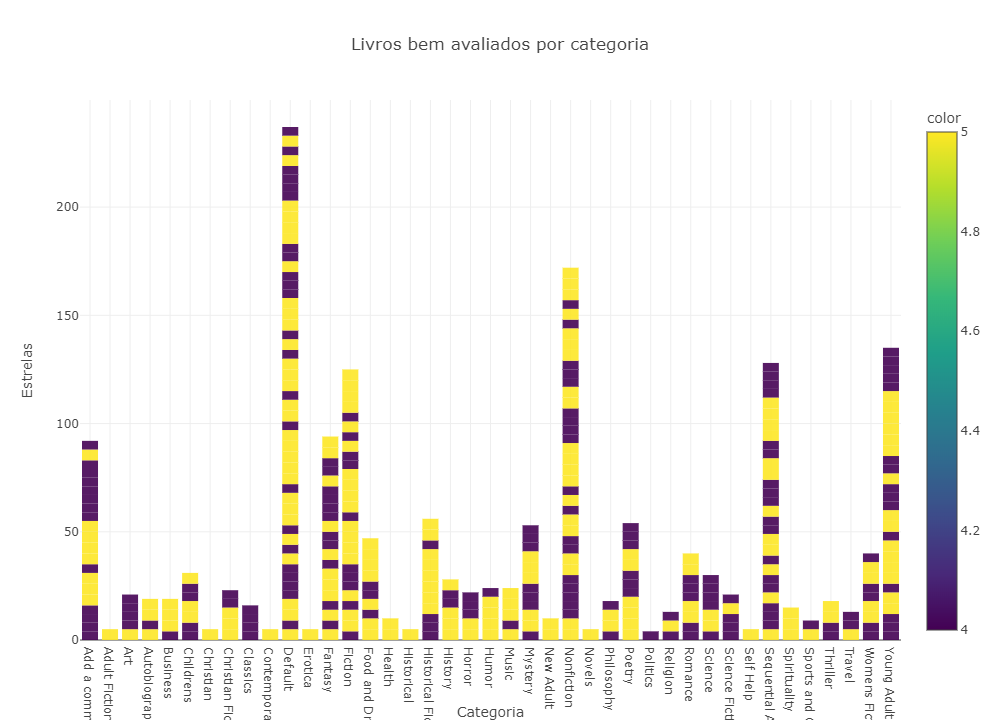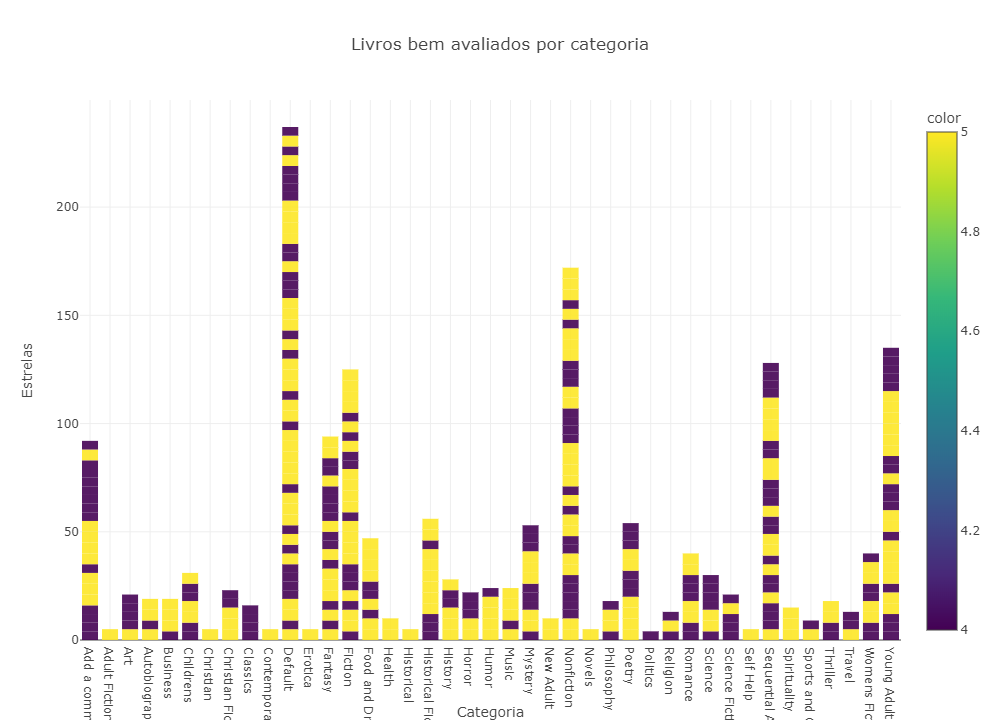

In [33]:
#Retira colunas desnecessárias ao modelo preditivo 
dados.drop(['estocagem','precos'], axis=1, inplace=True)
dados = dados.sort_values(by=['categorias']) #organizando pela coluna categorias

In [34]:
dados = dados.reset_index(drop = True) #organizando a indexação
display(dados)

,titulos,categorias,avaliacoes
0,Logan Kade (Fallen Crest High #5.5),Academic,2
1,The Tipping Point: How Little Things Can Make ...,Add a comment,2
2,The Sense of an Ending,Add a comment,3
3,The Midnight Watch: A Novel of the Titanic and...,Add a comment,1
4,The Gray Rhino: How to Recognize and Act on th...,Add a comment,4
...,...,...,...
995,Golden (Heart of Dread #3),Young Adult,4
996,Catching Jordan (Hundred Oaks),Young Adult,3
997,The Art of Not Breathing,Young Adult,4
998,No Love Allowed (Dodge Cove #1),Young Adult,4


In [35]:
#Criação de um Sistema de Recomendação por Conteúdo

#Problema - Construir o sistema com base na categoria de livros lidos anteriormente na Book Club

#Bibliotecas skitlearn para análise preditiva de dados
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
#Utiliza-se TfidfVectorizer que converterá nossa 'visão geral' (uma coluna de texto) em numérica.
tfidf = TfidfVectorizer()
dados['categorias'] = dados['categorias'].fillna('')

#Método 'fit' para construir a matriz necessária
categorias_num = tfidf.fit_transform(dados['categorias'])
categorias_num.shape

(1000, 53)

In [37]:
'''Agora para encontrar similaridade entre os livros usaremos o cosine_similarity(cosseno similaridade), 
#uma medida da similaridade entre 2 vetores. Esta medida é o cosseno do ângulo entre eles.'''

similarity_matrix = linear_kernel(categorias_num,categorias_num)
similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [38]:
'''Cria-se uma série que mapeie o índice da matriz para os nomes dos livros,
isso facilita a alimentação dos nomes dos livros e obtém a recomendação.'''

mapping = pd.Series(dados.index,index = dados['titulos'])
mapping

titulos
Logan Kade (Fallen Crest High #5.5)                                            0
The Tipping Point: How Little Things Can Make a Big Difference                 1
The Sense of an Ending                                                         2
The Midnight Watch: A Novel of the Titanic and the Californian                 3
The Gray Rhino: How to Recognize and Act on the Obvious Dangers We Ignore      4
                                                                            ... 
Golden (Heart of Dread #3)                                                   995
Catching Jordan (Hundred Oaks)                                               996
The Art of Not Breathing                                                     997
No Love Allowed (Dodge Cove #1)                                              998
South of Sunshine                                                            999
Length: 1000, dtype: int64

In [39]:
'''Agora se criará uma função de recomendação usando o cosine_similarity(cosseno similaridade),
ela receberá o nome do livro e devolverá os 5 principais filmes recomendados'''

def recommender_system_categorie(book_name):
    dados_index = mapping[book_name]
    
    #similarity_score é a lista de index dos títulos e a lista das categoria
    similarity_score = list(enumerate(similarity_matrix[dados_index]))

    # 'sorted' classifica em ordem decrescente a pontuação de similaridade do livro inserido com todos os outros livros
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Obtém as pontuações dos 6 primeiros filmes mais semelhantes. Ignore o primeiro filme.

    similarity_score = similarity_score[1:6]

    # Retorna o nome do filme usando 'mapping series'

    book_indice = [i[0] for i in similarity_score]

    return(dados['titulos'].iloc[book_indice])

 

In [40]:
recommender_system_categorie('M Train')

78    Approval Junkie: Adventures in Caring Too Much
79                                          Lab Girl
80                             Life Without a Recipe
81         A Heartbreaking Work of Staggering Genius
82                                     The Argonauts
Name: titulos, dtype: object

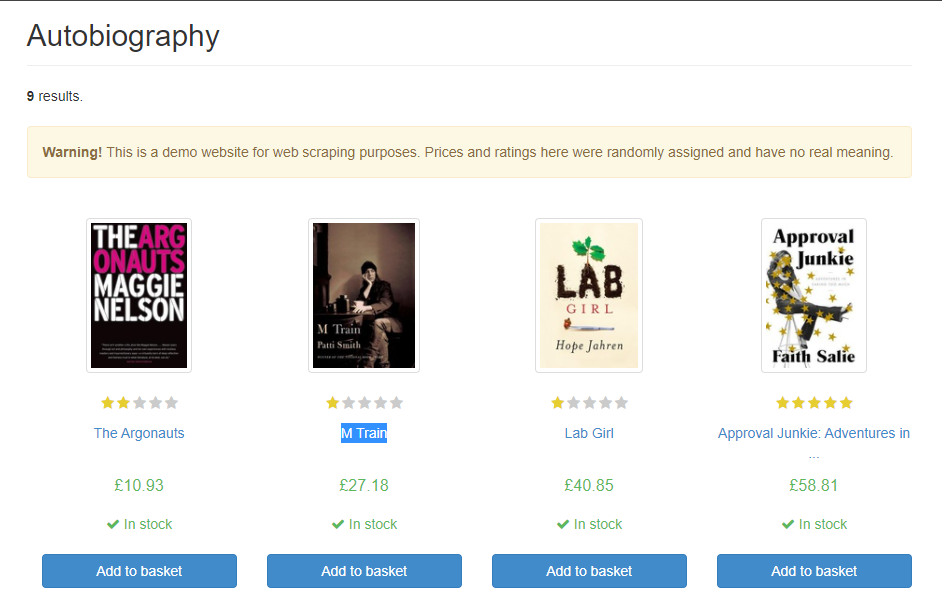